In [ ]:
# importing libraries
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import *

In [ ]:
# Link To ggogle drive to get dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get Dataset path
path="/content/drive/MyDrive/Colab Notebooks/dataset/smiles"

In [ ]:
# Define variables 
batch_size = 128
img_height = 64
img_width = 64

In [ ]:
# Split data itnto train van validation 
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13165 files belonging to 2 classes.
Using 2633 files for validation.


In [ ]:
# Print calsses names " output"
class_names = train_ds.class_names
print(class_names)

['negative', 'positive']


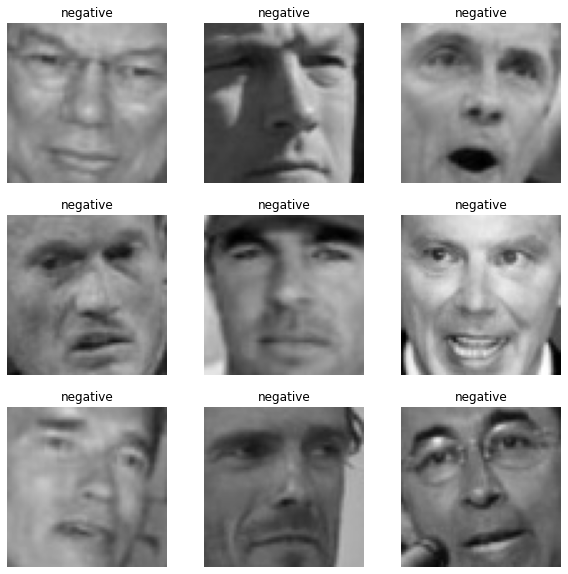

In [ ]:
# Plotting Nine images of train dataset 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# define function thta builds model 
def build_network():
    input_layer = Input(shape=(64, 64, 3))
    x = Conv2D(filters=20,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(input_layer)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.4)(x)
    x = Conv2D(filters=50,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(x)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    x = Dense(units=500)(x)
    x = ELU()(x)
    x = Dropout(0.4)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output)
    return model

In [ ]:
# create instance of the model 
model = build_network()

In [ ]:
# compile model 
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
EPOCHS = 15
model.fit(train_ds,
          validation_data=val_ds,
          epochs=EPOCHS,
          batch_size=batch_size,
          )

Epoch 1/15
83/83 [==============================] - 1988s 24s/step - loss: 1.8151 - accuracy: 0.7254 - val_loss: 9.2368 - val_accuracy: 0.5853
Epoch 2/15
83/83 [==============================] - 12s 138ms/step - loss: 0.4725 - accuracy: 0.8212 - val_loss: 0.6361 - val_accuracy: 0.8431
Epoch 3/15
83/83 [==============================] - 12s 140ms/step - loss: 0.4157 - accuracy: 0.8514 - val_loss: 0.5665 - val_accuracy: 0.8876
Epoch 4/15
83/83 [==============================] - 12s 139ms/step - loss: 0.3727 - accuracy: 0.8645 - val_loss: 0.3373 - val_accuracy: 0.8595
Epoch 5/15
83/83 [==============================] - 12s 139ms/step - loss: 0.3322 - accuracy: 0.8816 - val_loss: 0.5536 - val_accuracy: 0.8937
Epoch 6/15
83/83 [==============================] - 12s 139ms/step - loss: 0.2958 - accuracy: 0.8950 - val_loss: 0.3426 - val_accuracy: 0.8781
Epoch 7/15
83/83 [==============================] - 12s 138ms/step - loss: 0.2588 - accuracy: 0.9074 - val_loss: 0.4247 - val_accuracy: 0.9073

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 20)        1520      
                                                                 
 elu (ELU)                   (None, 64, 64, 20)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 20)       80        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 20)        0     

In [ ]:
model.history.history

{'loss': [1.8150736093521118,
  0.47247201204299927,
  0.415683388710022,
  0.3726797103881836,
  0.33220669627189636,
  0.2958100736141205,
  0.25877735018730164,
  0.23250572383403778,
  0.2056892216205597,
  0.18004435300827026,
  0.150120347738266,
  0.13550464808940887,
  0.1262626200914383,
  0.11304845660924911,
  0.0974869579076767],
 'accuracy': [0.7254082560539246,
  0.8212115168571472,
  0.8514052629470825,
  0.8645081520080566,
  0.881598949432373,
  0.8949866890907288,
  0.9074249863624573,
  0.9198632836341858,
  0.9243258833885193,
  0.9338207244873047,
  0.9440752267837524,
  0.9494872689247131,
  0.9548044204711914,
  0.9591720700263977,
  0.965343713760376],
 'val_loss': [9.23676872253418,
  0.6360771059989929,
  0.5664831399917603,
  0.3373168408870697,
  0.5536479353904724,
  0.3426320552825928,
  0.4246787130832672,
  0.2799451947212219,
  0.3025290071964264,
  0.3463597297668457,
  0.2952686846256256,
  0.34351447224617004,
  0.36621296405792236,
  0.3523613214492

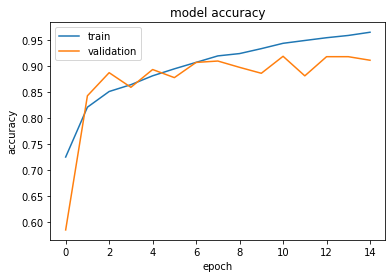

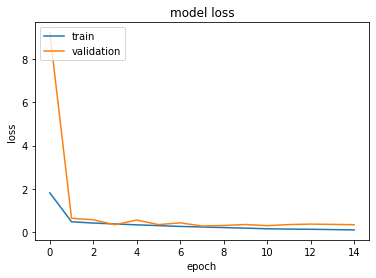

In [ ]:
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()